# Introduction:
*        RMS Titanic was a British passenger liner operated by the White Star Line that sank in the North Atlantic Ocean in the early morning hours of 15 April 1912, after striking an iceberg during her maiden voyage from Southampton to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making the sinking one of modern history's deadliest peacetime commercial marine disasters. RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line. She was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, chief naval architect of the shipyard at the time, died in the disaster.(Wikipedia)

<font color = "blue">

# Content:

* [1. Load and Check Data](#1)
* [2. Variable Description](#2)
  * [2.1. Univariate Variable Analysis](#3)
  * [2.2. Categorical Variable Analysis](#4)
  * [2.3. Numerical Variable Analysis](#5)
* [3. Basic Data Analysis](#6)
* [4. Outlier Detection](#7)
* [5. Missing Value](#8)
  * [5.1. Find Missing Value](#9)
  * [5.2. Fill Missing Value](#10)
* [6. Visualization](#11)
  * [6.1. Correlation Between SibSp - Parch - Age - Fare - Survived](#12)
  * [6.2. SibSp - Survived](#13)
  * [6.3. Parch - Survived](#14)
  * [6.4. Pclass - Survived](#15)
  * [6.5. Age - Survived](#16)
  * [6.6. Pclass - Survived - Age](#17)
  * [6.7. Embarked - Sex - Pclass - Survived](#18)
  * [6.8. Embarked - Sex - Fare - Survived](#19)
* [7. Fill Missing: Age Feature](#20)
* [8. Feature Engineering](#21)
  * [8.1. Name -Title](#22)
  * [8.2. Family Size](#23)
  * [8.3. Embarked](#24)
  * [8.4. Ticket](#25)
  * [8.5. Pclass](#26)
  * [8.6. Sex](#27)
  * [8.7. Drop Passenger ID and Cabin](#28)
* [9. Modelling](#29)
  * [9.1. Train Test Split](#30)
  * [9.2. Simple Logistic Regression](#31)
  * [9.3. Hyperparameter Tuning - Grid Search - Cross Validation](#32)
  * [9.4. Ensemble Modelling](#33)
* [10. Prediction and Submission](#34)  

In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")
import seaborn as sns
from collections import Counter



# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

<a id = "1"></a><br>
## 1. Load and Check Data:


In [76]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_passengerID = test_df["PassengerId"]

In [77]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [78]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<a id = "2"></a><br>
## 2. Variable Description

1. PassengerId: Unique id munber to each passenger.
1. Survived: Passenger survided (1) or died (0).
1. Pclass: Passenger class.
1. Name: Name of passenger.
1. Sex: Gender of passenger.
1. Age: Age of passenger.
1. SibSp: Number of siblings/spouses.
1. Parch: Number of parents/children.
1. Ticket: Ticket number.
1. Fare: Amount of money spent on ticket.
1. Cabin: Cabin category.
1. Embarked: Port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southhampton)
    
    

In [80]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* float64(2): Fare, age.
* int64(5): Pclass, sibsp, parch, passengerid, survived.
* objects(5): Cabin, embarked, ticket, name, sex.

<a id = "3"></a><br>
## 2.1. Univariate Variable Analysis
* Categorical Variable Analysis: Survived, sex, pclass, embarked, cabin, name, ticket, sibsp, parch.
* Numerical Variable Analysis: Age, passengerid, fare.

<a id = "4"></a><br>
## 2.2. Categorical Variable Analysis:


In [81]:
def bar_plot(variable):
    #___
    #    input: variable ex:"sex"
    #    output:bar plot & value count
    #___
    
    # get a feature
    var = train_df[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    #visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n {}".format(variable,varValue))

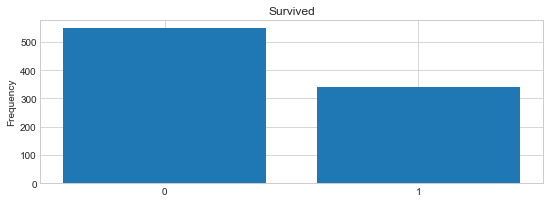

Survived:
 0    549
1    342
Name: Survived, dtype: int64


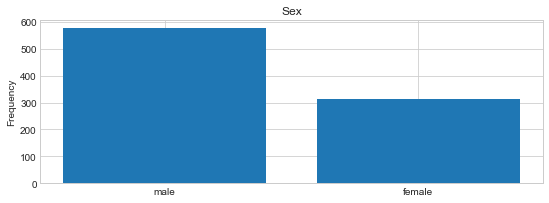

Sex:
 male      577
female    314
Name: Sex, dtype: int64


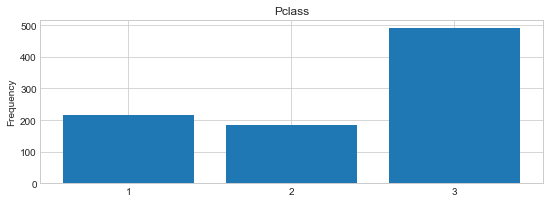

Pclass:
 3    491
1    216
2    184
Name: Pclass, dtype: int64


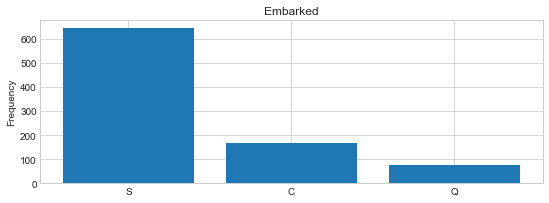

Embarked:
 S    644
C    168
Q     77
Name: Embarked, dtype: int64


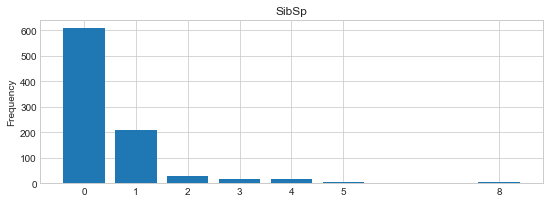

SibSp:
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


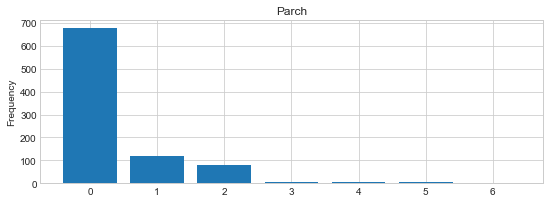

Parch:
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [82]:
category1 = ["Survived", "Sex", "Pclass", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [83]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print ("{} \n".format(train_df[c].value_counts()))

B96 B98        4
G6             4
C23 C25 C27    4
D              3
C22 C26        3
              ..
B73            1
F E69          1
D45            1
A6             1
C45            1
Name: Cabin, Length: 147, dtype: int64 

Ryerson, Miss. Susan Parker "Suzette"              1
Hippach, Mrs. Louis Albert (Ida Sophia Fischer)    1
Hickman, Mr. Lewis                                 1
Dantcheff, Mr. Ristiu                              1
Henry, Miss. Delia                                 1
                                                  ..
Sunderland, Mr. Victor Francis                     1
Calderhead, Mr. Edward Pennington                  1
Johansson, Mr. Gustaf Joel                         1
Dooley, Mr. Patrick                                1
Ivanoff, Mr. Kanio                                 1
Name: Name, Length: 891, dtype: int64 

1601        7
347082      7
CA. 2343    7
CA 2144     6
347088      6
           ..
370373      1
239854      1
3101277     1
349252      1
335677   

<a id = "5"></a><br>
## 2.3. Numerical Variable Analysis:

In [84]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(train_df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

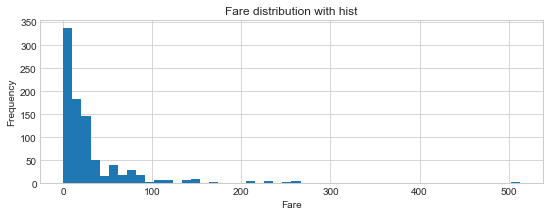

/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


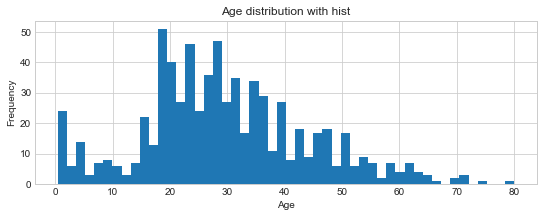

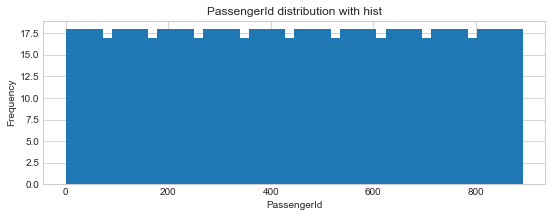

In [85]:
numericVar = ["Fare", "Age","PassengerId"]
for n in numericVar:
    plot_hist(n)

<a id = "6"></a><br>
# 3. Basic Data Analysis
* Pclass - Survived
* Sex - Survived
* SibSp - Survived
* Parch - Survived

In [86]:
# Pclass vs Survived
train_df[["Pclass","Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [87]:
# Sex vs Survived
train_df[["Sex","Survived"]].groupby(["Sex"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [88]:
# Sibsp vs Survived
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [89]:
# Parch vs Survived
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean().sort_values(by = "Survived", ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


<a id = "7"></a><br>
# 4. Outlier Detection

In [90]:
def detect_outlier(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [91]:
train_df.loc[detect_outlier(train_df,["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [92]:
#drop outliers
train_df = train_df.drop(detect_outlier(train_df,["Age", "SibSp", "Parch", "Fare"]), axis = 0).reset_index(drop =True)

<a id = "8"></a><br>
# 5. Missing Value
   *   [Find Missing Value]
   *   [Fill Missing Value]

In [93]:
train_df_len = len(train_df)
train_df = pd.concat([train_df,test_df],axis = 0).reset_index(drop = True)

In [94]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<a id = "9"></a><br>
## 5.1. Find Missing Value

In [95]:
train_df.columns[train_df.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [96]:
train_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             256
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1007
Embarked          2
dtype: int64

<a id = "10"></a><br>
## 5.2. Fill Missing Value

* embarked has 2 missing value.
* Fare has 1 missing value.

In [97]:
train_df[train_df["Embarked"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


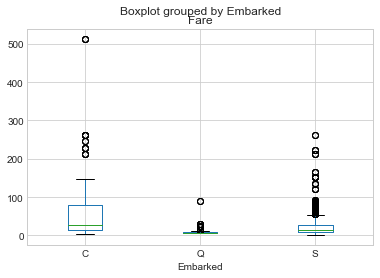

In [98]:
train_df.boxplot(column="Fare",by = "Embarked")
plt.show()

In [99]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [100]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1033,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [101]:
train_df["Fare"] = train_df["Fare"].fillna(np.mean(train_df[train_df["Pclass"] == 3]["Fare"]))

In [102]:
train_df[train_df["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "11"></a><br>
# 6. Visualization


<a id = "12"></a><br>
## 6.1. Correlation Between SibSp - Parch - Age - Fare - Survived

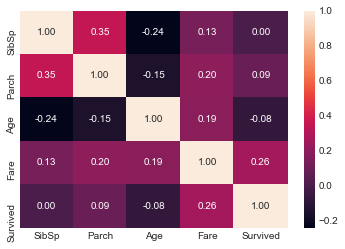

In [103]:
list1 =["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot = True, fmt = ".2f")
plt.show()

Fare feature seems to have correiation with survived feature (0.26).

<a id = "13"></a><br>
## 6.2. SibSp - Survived

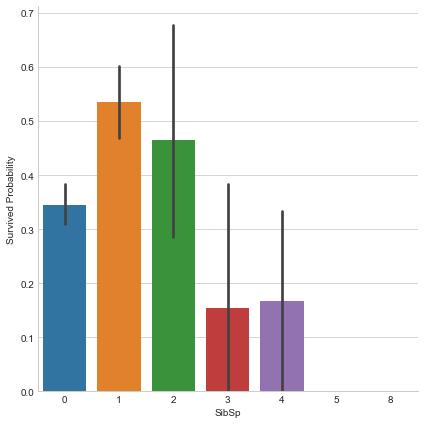

In [104]:
g = sns.catplot(x = "SibSp", y = "Survived", data = train_df, kind = "bar", height = 6)
g.set_ylabels("Survived Probability")
plt.show()

* Having a lot of SibSp have less chance to survive.
* If SibSp = 0 or 0r 2 passenger has more chance to survive.
* We can consider a new feature describing these categories.

<a id = "14"></a><br>
## 6.3. Parch - Survived

/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


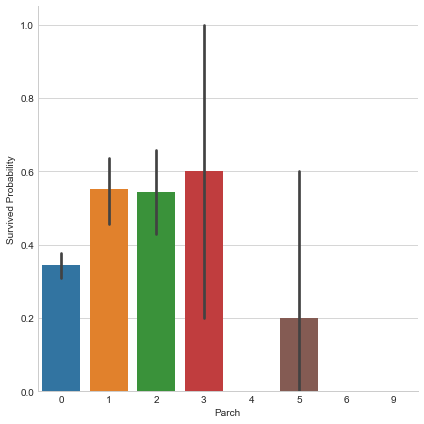

In [105]:
g = sns.factorplot(x = "Parch", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

* SibSp and Parch can be used for new feature extraction with treshold = 3.
* Small  families have more chance to survive.
* There is astandard deviation in survivel of passenger with parch = 3.

<a id = "15"></a><br>
## 6.4. Pclass - Survived

/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


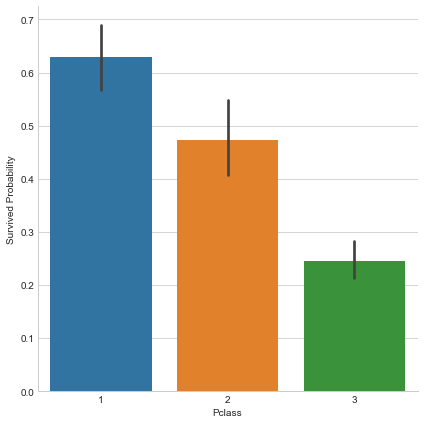

In [106]:
g = sns.factorplot(x = "Pclass", y = "Survived", data = train_df, kind = "bar", size = 6)
g.set_ylabels("Survived Probability")
plt.show()

<a id = "16"></a><br>
## 6.5. Age - Survived

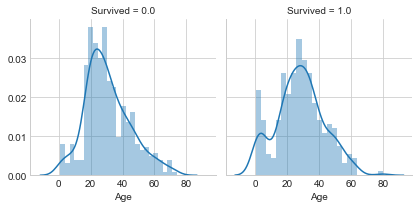

In [107]:
g = sns.FacetGrid(train_df, col = "Survived")
g.map(sns.distplot, "Age", bins = 25)
plt.show()

* Age <= 10 has a high survival rate,
* Oldest passenger (80) survived,
* large number of 20 years old did not survive,
* Most passengers are in 15-25 age range,
* Use age feature in tarining 
* Use age distribution for missing value of age feature.

<a id = "17"></a><br>
## 6.6. Pclass - Survived - Age

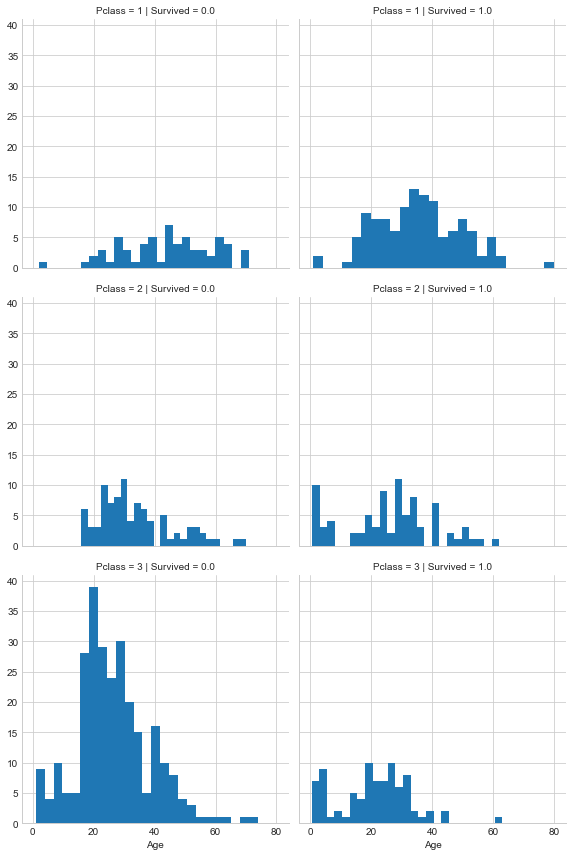

In [108]:
g = sns.FacetGrid(train_df, col = "Survived", row = "Pclass", height = 4)
g.map(plt.hist, "Age", bins = 25)
g.add_legend()
plt.show()

* Pclass is important feature for model training.

<a id = "18"></a><br>
## 6.7. Embarked - Sex - Pclass - Survived

/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/axisgrid.py:733: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


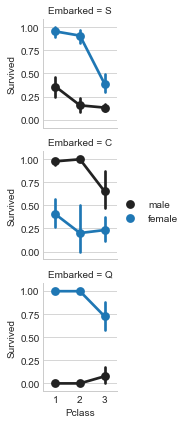

In [109]:
g = sns.FacetGrid(train_df, row = "Embarked", height = 2)
g.map(sns.pointplot, "Pclass", "Survived", "Sex")
g.add_legend()
plt.show()

* Female passengers have much better survival rate than male passengers.
* Male passengers have better survival rate in pclass 3 in C.
* Embarked and sex will be used in training.

<a id = "19"></a><br>
## 6.8. Embarked - Sex - Fare - Survived

/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


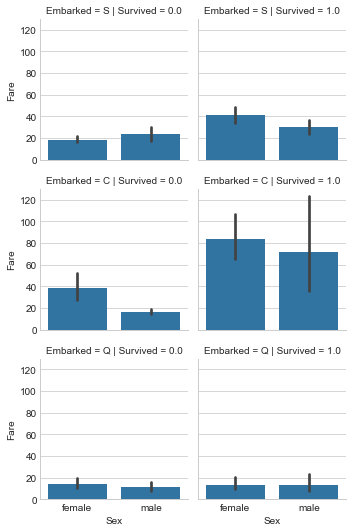

In [110]:
g = sns.FacetGrid(train_df, row = "Embarked", col = "Survived", size = 2.5)
g.map(sns.barplot, "Sex", "Fare")
plt.show()

* Passengers who pay higher fare have better survival.
* Fare can be used as categorical for training.


<a id = "20"></a><br>
# 7. Fill Missing: Age Feature

In [111]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1.0,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1.0,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0.0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
1291,1302,NaN,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


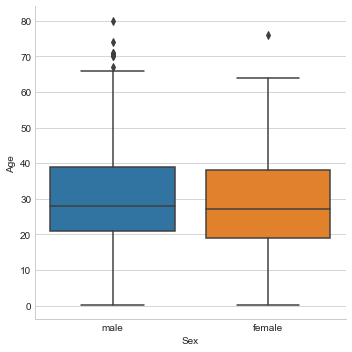

In [112]:
sns.factorplot(x= "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

* Sex is not informative for age prediction. Age distribution seems to be same.

/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


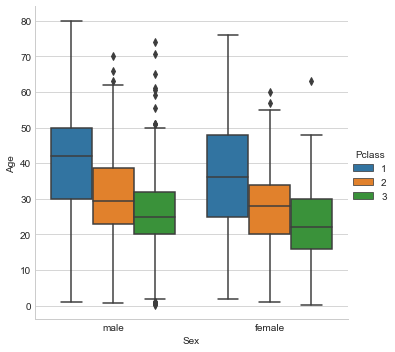

In [113]:
sns.factorplot(x= "Sex", y = "Age", hue = "Pclass", data = train_df, kind = "box")
plt.show()

* First class passenger is older than second class and second class is older than third class.


/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


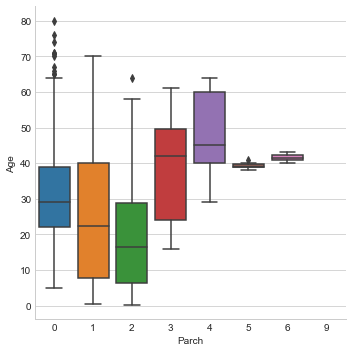

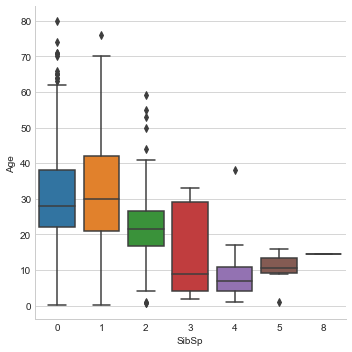

In [114]:
sns.factorplot(x= "Parch", y = "Age", data = train_df, kind = "box")
sns.factorplot(x= "SibSp", y = "Age", data = train_df, kind = "box")
plt.show()

In [115]:
train_df["Sex"] = [1 if i == "male" else 0 for i in train_df["Sex"]]

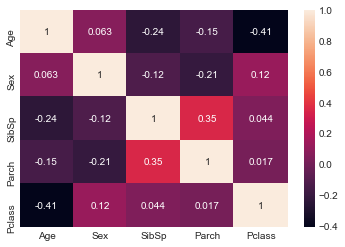

In [116]:

sns.heatmap(train_df[["Age", "Sex", "SibSp", "Parch", "Pclass"]].corr(), annot = True)

* Age is not correlated with sex but it is correlated with parch, sibsp and pclass.

In [117]:
index_nan_age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) &(train_df["Parch"] == train_df.iloc[i]["Parch"])& (train_df["Pclass"] == train_df.iloc[i]["Pclass"]))].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df["Age"].iloc[i] = age_pred
    else:
        train_df["Age"].iloc[i] = age_med   

/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [118]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


<a id = "21"></a><br>
# 8. Feature Engineering

<a id = "22"></a><br>
# 8.1. Name - Title

In [119]:
train_df["Name"].head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [120]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [121]:
train_df["Title"].head(10)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

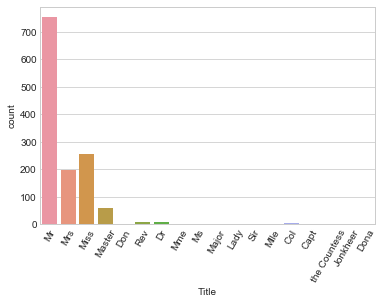

In [122]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=60)
plt.show()

In [123]:
# convert to categorical
train_df["Title"] = train_df["Title"].replace(["Lady","the Countess","Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"other")
train_df["Title"] = [0 if i == "Master" else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" else 2 if i == "Mr" else 3 for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

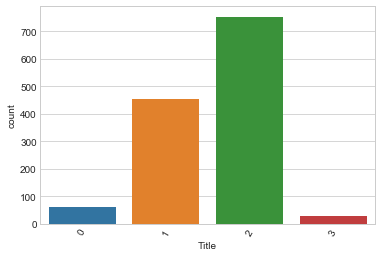

In [124]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=60)
plt.show()

/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


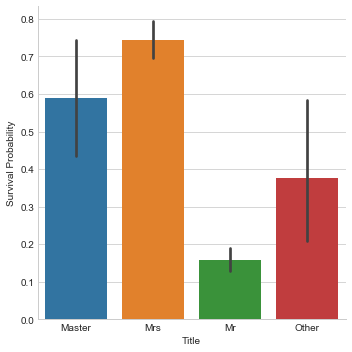

In [125]:
g = sns.factorplot(x="Title", y="Survived", data=train_df, kind="bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [126]:
train_df.drop(labels = ["Name"], axis=1, inplace=True)

In [127]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,2


In [128]:
train_df = pd.get_dummies(train_df,columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


<a id = "23"></a><br>
# 8.2. Family Size

In [129]:
train_df["FSize"] = train_df["SibSp"] + train_df["Parch"] +1

In [130]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,FSize
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1


/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


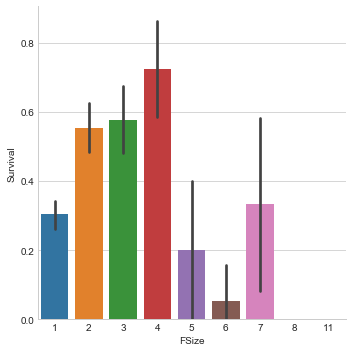

In [131]:
g = sns.factorplot(x="FSize", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

In [132]:
train_df["family_size"] = [1 if i<5 else 0 for i in train_df["FSize"]]

In [133]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,FSize,family_size
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,1
5,6,0.0,3,1,25.0,0,0,330877,8.4583,NaN,Q,0,0,1,0,1,1
6,7,0.0,1,1,54.0,0,0,17463,51.8625,E46,S,0,0,1,0,1,1
7,8,0.0,3,1,2.0,3,1,349909,21.0750,NaN,S,1,0,0,0,5,0
8,9,1.0,3,0,27.0,0,2,347742,11.1333,NaN,S,0,1,0,0,3,1
9,10,1.0,2,0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,0,2,1


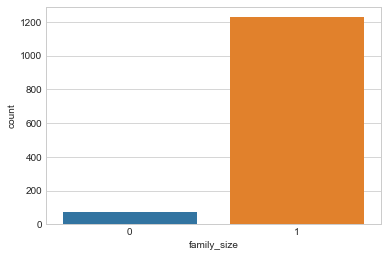

In [134]:
sns.countplot(x="family_size", data=train_df)
plt.show()

/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


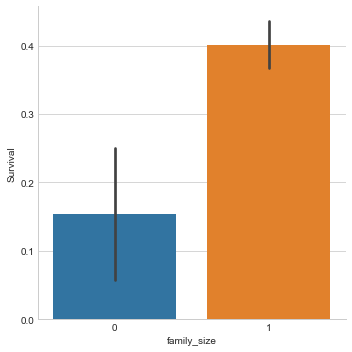

In [135]:
g = sns.factorplot(x="family_size", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

Small families have more chance to survive than large families.

In [136]:
train_df = pd.get_dummies(train_df,columns=["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,FSize,family_size_0,family_size_1
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2,0,1
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,1


<a id = "24"></a><br>
# 8.3. Embarked

In [137]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

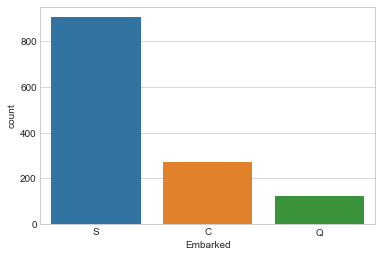

In [138]:
sns.countplot(x="Embarked", data=train_df)
plt.show()

In [139]:
train_df = pd.get_dummies(train_df,columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,FSize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


<a id = "25"></a><br>
## 8.4. Ticket

In [140]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [141]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [142]:
train_df["Ticket"].head()

0        A5
1        PC
2    STONO2
3         x
4         x
Name: Ticket, dtype: object

In [143]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,FSize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0.0,3,1,22.0,1,0,A5,7.2500,NaN,0,0,1,0,2,0,1,0,0,1
1,2,1.0,1,0,38.0,1,0,PC,71.2833,C85,0,1,0,0,2,0,1,1,0,0
2,3,1.0,3,0,26.0,0,0,STONO2,7.9250,NaN,0,1,0,0,1,0,1,0,0,1
3,4,1.0,1,0,35.0,1,0,x,53.1000,C123,0,1,0,0,2,0,1,0,0,1
4,5,0.0,3,1,35.0,0,0,x,8.0500,NaN,0,0,1,0,1,0,1,0,0,1


In [144]:
train_df = pd.get_dummies(train_df,columns=["Ticket"], prefix = "T")

In [145]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x
0,1,0.0,3,1,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1.0,1,0,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1.0,3,0,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,1,0,0,0,0,0
3,4,1.0,1,0,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0.0,3,1,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1


<a id = "26"></a><br>
## 8.5. Pclass

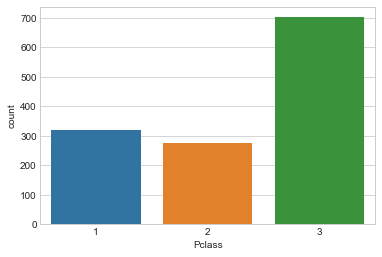

In [146]:
sns.countplot(x="Pclass", data=train_df)
plt.show()

In [147]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df,columns=["Pclass"])
train_df

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0.0,1,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1.0,0,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1.0,0,26.0,0,0,7.9250,NaN,0,1,...,0,1,0,0,0,0,0,0,0,1
3,4,1.0,0,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0.0,1,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,1,25.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1295,1306,NaN,0,39.0,0,0,108.9000,C105,0,0,...,0,0,0,0,0,0,0,1,0,0
1296,1307,NaN,1,38.5,0,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1297,1308,NaN,1,25.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


<a id = "27"></a><br>
## 8.6. Sex

In [148]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"])

In [149]:
train_df

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
0,1,0.0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1.0,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1.0,26.0,0,0,7.9250,NaN,0,1,0,...,0,0,0,0,0,0,0,1,1,0
3,4,1.0,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0.0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,25.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1295,1306,NaN,39.0,0,0,108.9000,C105,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1296,1307,NaN,38.5,0,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1297,1308,NaN,25.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


<a id = "28"></a><br>
## 8.7. Drop Passenger ID and Cabin

In [150]:
train_df.drop(labels= ["PassengerId","Cabin"],axis=1,inplace=True)

In [151]:
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'FSize', 'family_size_0', 'family_size_1',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'T_A', 'T_A4', 'T_A5',
       'T_AQ3', 'T_AQ4', 'T_AS', 'T_C', 'T_CA', 'T_CASOTON', 'T_FC', 'T_FCC',
       'T_Fa', 'T_LINE', 'T_LP', 'T_PC', 'T_PP', 'T_PPP', 'T_SC', 'T_SCA3',
       'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_STONOQ', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1'],
      dtype='object')

<a id = "29"></a><br>
# 9. Modelling

In [152]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

<a id = "30"></a><br>
## 9.1. Train Test Split

In [153]:
train_df_len

881

In [154]:
test = train_df[train_df_len:]
test.drop(labels = ["Survived"],axis = 1, inplace = True)

/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [155]:
test.head()

,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,FSize,family_size_0,...,T_STONOQ,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_0,Sex_1
881,34.5,0,0,7.8292,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
882,47.0,1,0,7.0000,0,1,0,0,2,0,...,0,0,0,0,1,0,0,1,1,0
883,62.0,0,0,9.6875,0,0,1,0,1,0,...,0,0,0,0,1,0,1,0,0,1
884,27.0,0,0,8.6625,0,0,1,0,1,0,...,0,0,0,0,1,0,0,1,0,1
885,22.0,1,1,12.2875,0,1,0,0,3,0,...,0,0,0,0,1,0,0,1,1,0


In [156]:
train = train_df[:train_df_len]
x_train = train.drop(labels= "Survived",axis=1)
y_train = train["Survived"]
x_train, x_test, y_train ,y_test = train_test_split(x_train, y_train, test_size=0.33, random_state=42)
print("x_train", len(x_train))
print("x_test", len(x_test))
print("y_train", len(y_train))
print("y_test", len(y_test))
print("test", len(test))

x_train 590
x_test 291
y_train 590
y_test 291
test 418


<a id = "31"></a><br>
## 9.2. Simple Logistic Regression

In [157]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
acc_logreg_train = round(logreg.score(x_train, y_train)*100,2)
acc_logreg_test = round(logreg.score(x_test, y_test)*100,2)
print("Training Accuracy: % {}".format(acc_logreg_train))
print("Testing Accuracy: % {}".format(acc_logreg_test))

Training Accuracy: % 82.71
Testing Accuracy: % 81.79


/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<a id = "32"></a><br>
## 9.3. Hyperparameter Tuning - Grid Search - Cross Validation
We will compare 5 machine learning classifier and evaluate mean accuracy of each them by stratified cross validation.
* Decision Tree
* SVM
* Random Forest
* KNN
* Logistic Regression

In [158]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}
classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [160]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(x_train,y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 464 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2420 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    3.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


0.7983050847457627
Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   17.8s finished


0.840677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 109 out of 140 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.4s finished
/Users/fatmimi/opt/anaconda3/envs/playground/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


0.8203389830508474
Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s


0.7796610169491525


[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:    0.6s finished


Text(0.5, 1.0, 'Cross Validation Scores')

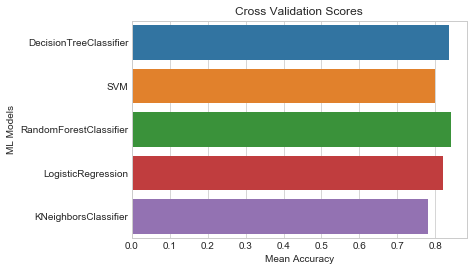

In [161]:
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":["DecisionTreeClassifier", "SVM","RandomForestClassifier",
             "LogisticRegression",
             "KNeighborsClassifier"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("Mean Accuracy")
g.set_title("Cross Validation Scores")

<a id = "33"></a><br>
## 9.4. Ensemble Modelling

In [165]:
votingC = VotingClassifier(estimators = [("dt",best_estimators[0]),
                                        ("rfc",best_estimators[2]),
                                        ("lr",best_estimators[3])],
                                        voting = "soft", n_jobs = -1)
votingC = votingC.fit(x_train, y_train)
print(accuracy_score(votingC.predict(x_test),y_test))

0.8213058419243986


<a id = "34"></a><br>
# 10. Prediction and Submission

In [166]:
test_survived = pd.Series(votingC.predict(test), name = "Survived").astype(int)
results = pd.concat([test_passengerID, test_survived],axis = 1)
results.to_csv("titanic.csv", index = False)